<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/Dog-classification-Deep-learning-project/blob/main/Dog_classification_Deep_learning_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## End to End Multi-class Dog breed Identification

This notebook builds an end to end multi-class image classifier using
Tensorflow 2.0 and Tensorflow Hub

## 1.Problem

Identifying the breed of the dog given a image of dog.

When i am sitting in a cafe and i took a photo of a dog, then i want to know what breed of dog it is.

## 2.Data

The data we're using is from kaggel dog breed identification competetion.
https://www.kaggle.com/competitions/dog-breed-identification/overview

## 3.Evaluation

The evaluation is a file with prediction probabilities of each dog breed of  each test image
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4.Features.

Some information abouit the data:
* we're dealing with images ( unstrctured data) so its probably best use deep learning and transfer learning.
* There are 120 breed of dog( this means there are 120 different classes).
* There are around 10000+ images in the trainning set.( these images have labes)
* There are around 10000+ images in the test set.( these images dont have labels,as we want to predict them)

## Get our workflow ready

In [52]:
# Import tensorflow into collab
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("the tensorflow version is :",tf.__version__)
print("the tensorflowhub version is :",hub.__version__)

the tensorflow version is : 2.8.2
the tensorflowhub version is : 0.12.0


## Getting our Data ready ( turning into tensors)

with all machine learning models our data has to be in numerical format. so that's what we will be doing first . turning our images into Tensors(numerical representataions)

Lets start by accessing our data and checking out labels.

In [53]:
# check out labels of our data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
labels_csv.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [54]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


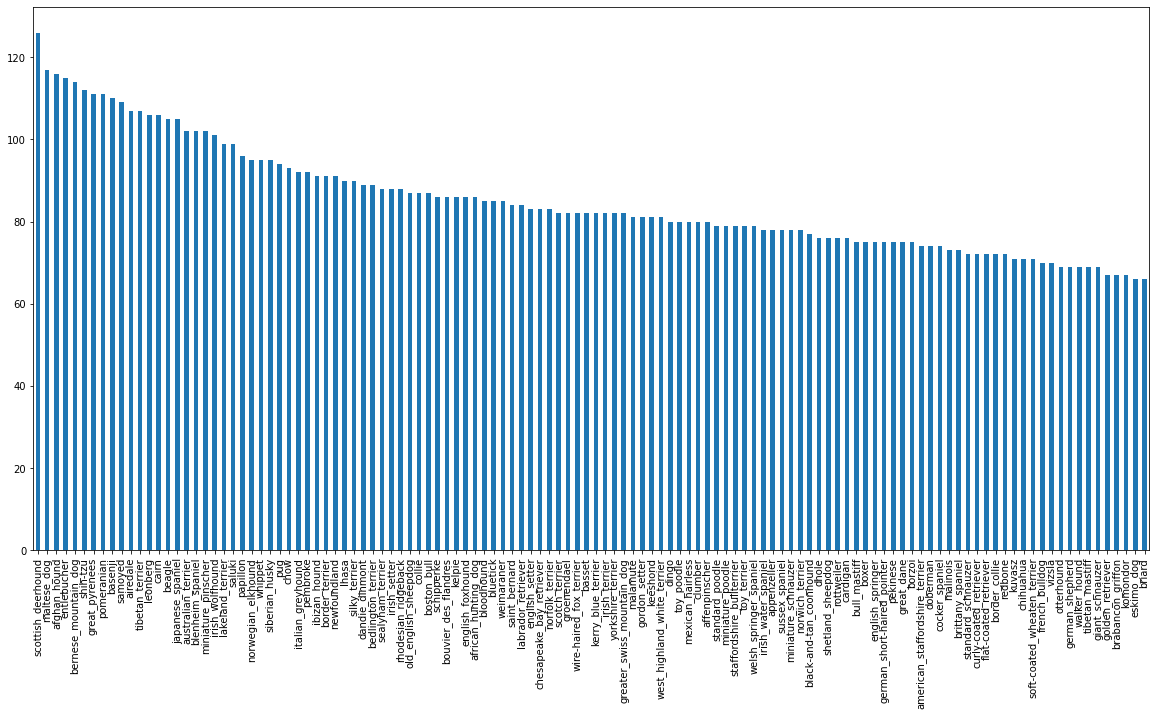

In [55]:
# Plotting Bar Graph of Breed column
labels_csv['breed'].value_counts().plot.bar(figsize = (20,10))

In [56]:
# What's the median of images per class
labels_csv['breed'].value_counts().median()

82.0

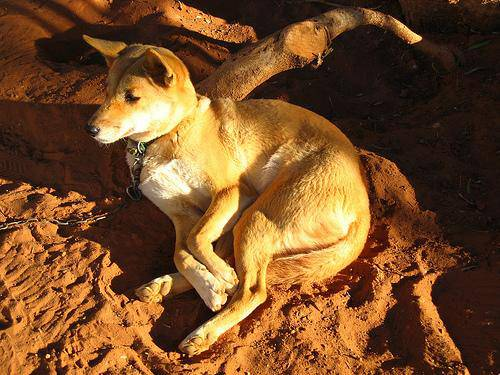

In [57]:
# lets view an image\
from IPython.display import Image
Image('/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels

Let's get list of all our images file pathnames.

In [58]:
# Create pathnames from image id
filename  = ["/content/drive/MyDrive/Dog Vision/train/"+fname+'.jpg' for fname in labels_csv['id']] 

In [59]:
filename[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [60]:
# check whether number of filenames matches with actual image files
import os
if len(os.listdir('/content/drive/MyDrive/Dog Vision/train'))== len(filename):
  print("Filenames matches actual amount of files ,Proceed!!")
else:
  print("Filenames not matches actual amount of files ,DONT Proceed!!")  

Filenames matches actual amount of files ,Proceed!!


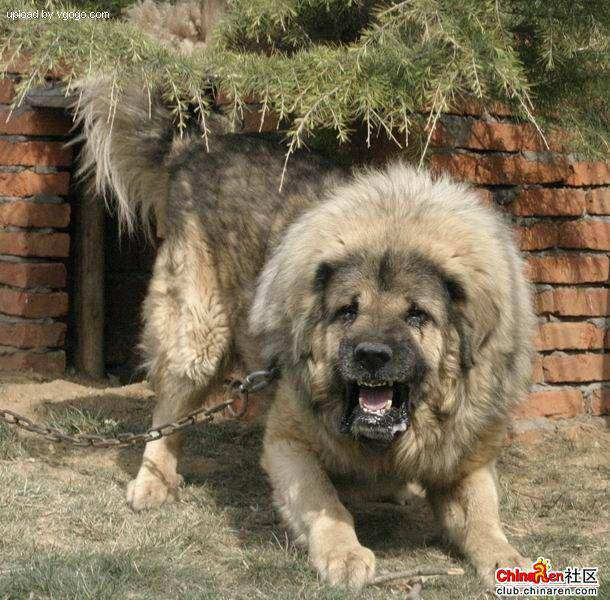

In [61]:
# one more check
Image(filename[9000])

In [62]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we have got our trainning image filepath in a list. Let's prepare our labels

In [63]:
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels) doessame thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [64]:
len(labels)

10222

In [65]:
# See if number of labels matches number of filenames
if len(labels)== len(filename):
  print("number of labels matches number of filename")
else:
   print("nmber of labels does'nt matches number of filename")  

number of labels matches number of filename


In [66]:
unique_breed = np.unique(labels)
len(unique_breed)

120

In [67]:
# Turning a single labels into an array of booleans
print(labels[0])
labels[0]== unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [68]:
# Turn every labels into boolean array
boolean_labels = [label== unique_breed for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [69]:
len(boolean_labels)

10222

In [70]:
# Example Turning boolean arrays into integers
print(labels[0]) # Original label
print(np.where(unique_breed == labels[0])) #index where labels occurs
print(boolean_labels[0].argmax()) # index where labels occur in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where sample occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [71]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [72]:
filename[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creation our own validation set

Since kaggle doesn't provide us with the validation set. we are going to create on our own

In [73]:
# set up X and Y variables
X = filename
y = boolean_labels

### we are going to start off experimenting with 1000 images and increases as needed

In [74]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min :1000,max : 10000 ,step : 1000}

In [75]:
from scipy.sparse.construct import random
# Let's split our data into train and validation set
from sklearn.model_selection import train_test_split

# split them into trainning and validation set of total size of NUM_IMAGES
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size = 0.2,
                                               random_state = 42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [76]:
# Let's have a geet at our trainnig data
X[:5],y[:2]


(['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
  '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
  '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

##**Preprocessing images:(Turning images into tensors)**

To preprocess our images into Tensors we are going to write a function which does a few things:
1. Take and image filepath as input
2. Use Tensorflow to read the file and save it to avariable "image"
3. Turn our "image" (a jpg) into Tensors.
4. resize the "image" of the shape(224,224).
5. return the modified "image"

Before we do lets see whats importing an image looks like


In [77]:
# convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [78]:
image.max(),image.min()

(255, 0)

In [79]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [80]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Now we have seen what an image  looks like in the form of tensors. Let's make a function to preprocess them.

1.Take and image filepath as input

2.Use Tensorflow to read the file and save it to avariable "image"

3.Turn our "image" (a jpg) into Tensors.

4.resize the "image" of the shape(224,224).

5.return the modified "image"

In [81]:
# Define Image size
IMG_SIZE = 224

# Create a function for preprocessing images
def image_process(image_path ,img_size = IMG_SIZE):
  """
  Takes an image filepath and turns the image into tensors
  """
  # Read the image file
  image = tf.io.read_file(image_path)
  # turns the jpeg image into numerical tensors with 3 colour channels (Red,Green,Blue)
  image = tf.image.decode_jpeg(image ,channels = 3)
  # Convert the image channels valus from 0-255 to 0-1 value
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the Image to our desired value (224,224)
  image = tf.image.resize(image,size = [IMG_SIZE,IMG_SIZE])

  return image



## Turning our data into batches

Lets say you are trying to process 10000+ images in one go...they all might not fit into the memory

So that's why we do about 32( this is a batch size images) images at a time ( u can manually adjust the batch size if needed be).

In order to use TensorFlow effectively  we need our data in the form of Tensors tuples which looks like this :(images,labels)

In [82]:
# Create a simple function to return a tuple (image,label)
def get_image_label(image_path, label):
  """
    Takes an imae filepath name and the associated label,
    process the image and returns a tuple of (image,label)
  """
  image =image_process(image_path)
  return image,label   

In [83]:
# Demo of the above
(image_process(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## now we've got a way to turn our data into tuples of Tensors in the form:(image,label) Lets make a function to turn all our data (X & y ) into batches!

In [84]:
# Define a batch size and 32 is good start
BATCH_SIZE = 32

## Create a function to turn our data into batches
def create_data_batches(X ,y = None, batch_size = BATCH_SIZE, valid_data = False , test_data = False):
    """
    create batches of data out of image (X) and label(y) pairs.
    Shuffle the data if its trainning data and does'nt shuffle the data if its validation data.
    Also accepts test data as input (no labels).
    """

    # If data is a test dataset , we probably dont have any labels
    if test_data:
      print("Creating test data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths no labels
      data_batch = data.map(image_process).batch(BATCH_SIZE)
      return data_batch

    ## if the data is the valid dataset , we don't need to shuffle it
    elif valid_data:
      print("Creating validation data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # only filepaths no labels
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)
      return data_batch

    else:
      print("Creating trainning data batches...")
      # Turn filepaths and labels into tensors
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) 

      # shuffling pathnames and lables befor mapping image processsor function is faster than shuffling images
      data = data.shuffle(buffer_size = len(X))
      
      # Create (image,label)tuples (this also turns the image path intoa preprocessed image)
      data = data.map(get_image_label)

      # turn the trinning data into batches
      data_batch = data.batch(BATCH_SIZE)
      
    return data_batch  




In [85]:
# Creating trainning and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data = True)

Creating trainning data batches...
Creating validation data batches...


In [86]:
# Check out different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is now in batches, however these can be little hard to understand/comprehend , Let's visualize them

In [87]:
import matplotlib.pyplot as plt

# Create a function for viewing images in data batches:
def show_25_images(images,labels):
  """
  Display a plot of 25 images and their labes from a data batch
  """
  # setup the figure
  plt.figure(figsize = (10,10))
  # loop through 25 ( for dispaying 25 images)
  for i in range(25):
     # Create subplots (5 rows,5 columns)
     ax = plt.subplot(5,5,i+1)
     # Display an image
     plt.imshow(images[i])
     # Add the image labels as title
     plt.title(unique_breed[labels[i].argmax()])
     # turn the grid lines off
     plt.axis("off")
     


In [88]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

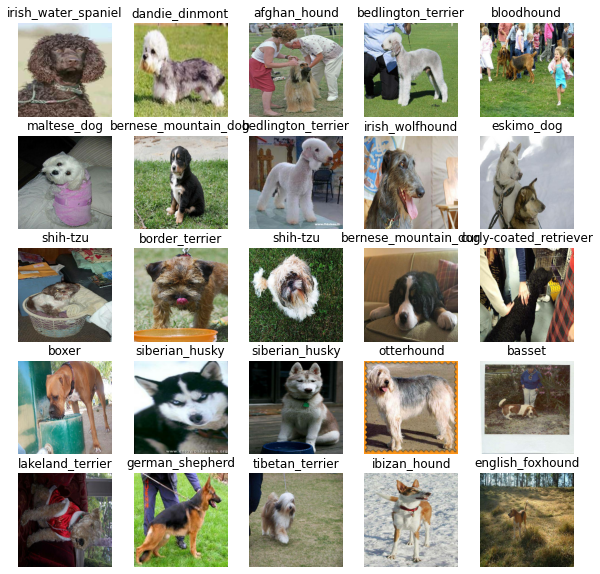

In [89]:
# now lets visualize the data in our trainning batch
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

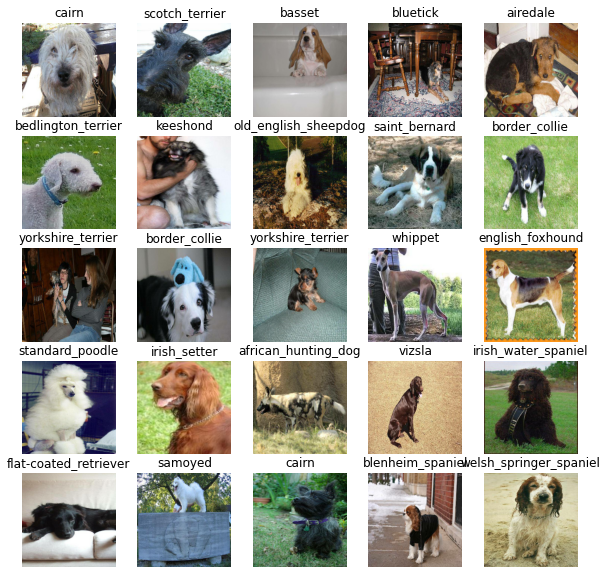

In [90]:
# now lets visualize the data in our Validation batch
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Before we build a model there are few things we need to do:

1. The input shape(our images shape, in the form of Tensors) of our models.
2. The output shape(image labels , in the form of Tensors)of our models.
3. The URL of our model we want to use:https://tfhub.dev/s?module-type=image-classification

In [91]:
## Set up input shape to our model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

# Set up output shape of our model
OUTPUT_SHAPE = len(unique_breed)
  
# Setup model url from tenserflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we've got our inputs, outputs and model  ready to go.
Let's put them together into Keras deep learning model!

Knowing this lets create a function which:

* Takes the input shape, output shape and the model we have choosen as 
  parameters.

* Define the layers in a Keras model in a sequential fashion:
 ( do this first, then this ,then that )

* compiles the model (says it should be evaluated and improved).

* Builds the model(tells the model input shape it'll be getting).

* Returns the model.



In [92]:
# Creates a function which builds a keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE,model_url = MODEL_URL):
   print("Building model with :",MODEL_URL)

   # Set up model layers
   model = tf.keras.Sequential([
       hub.KerasLayer(MODEL_URL), # layer 1 input layer
       tf.keras.layers.Dense(units = OUTPUT_SHAPE,activation = "softmax")
   ])

   # Compile the model
   model.compile(
       loss = tf.keras.losses.CategoricalCrossentropy(),
       optimizer = tf.keras.optimizers.Adam(),
       metrics = ['accuracy']
   )

   #Build the model
   model.build(INPUT_SHAPE)

   return model

In [93]:
model = create_model()
model.summary()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks:

Callbacks are helper functions a model can usedurning trainning to do suuch things as save its progress,check its progress or stops trainning early if a model strops improving.

We'll create two callbacks , one for Tensorboard which helps track our model progress and another for early stopping which prevents our model from trainning for too long.

### Tensorboard callback

To setup a tenseorboard callback we need to do 3 things:
1. load the tensorboard notebook extension.
2. Create the Tensorboard callbacks which is able to save log to a directory and passit tour model fit function.
3. Visualize our models trainning logs with the %tensorboard magic function(we'll do this after trainning our model).

In [94]:
# load tensorboard notebook extension
%load_ext tensorboard

In [95]:
import datetime

# Create a function to return Tensorboard callback
def create_tensorboard_callback():
   # Create a log directory for storing Tensorboard logs
   logdir = os.path.join("/content/drive/MyDrive/Dog Vision/logs",
                          # make it so the logs get tracked whenever we run our experiment)
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
   
   return tf.keras.callbacks.TensorBoard(logdir)
